In [1]:
%matplotlib inline

import geopandas
from libpysal import examples
import pysal
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify

### below work based on: https://darribas.org/gds_course/content/bD/lab_D.html

In [22]:
examples.builtin_datasets

{'10740': <libpysal.examples.builtin.LocalExample at 0x1a2311dc0>,
 'arcgis': <libpysal.examples.builtin.LocalExample at 0x1a2311f70>,
 'baltim': <libpysal.examples.builtin.LocalExample at 0x1a2311820>,
 'berlin': <libpysal.examples.builtin.LocalExample at 0x1a2311f10>,
 'book': <libpysal.examples.builtin.LocalExample at 0x1a2311fa0>,
 'burkitt': <libpysal.examples.builtin.LocalExample at 0x1a2311eb0>,
 'calemp': <libpysal.examples.builtin.LocalExample at 0x1a2311e20>,
 'chicago': <libpysal.examples.builtin.LocalExample at 0x1a2311040>,
 'columbus': <libpysal.examples.builtin.LocalExample at 0x1a23570a0>,
 'desmith': <libpysal.examples.builtin.LocalExample at 0x1a2357130>,
 'geodanet': <libpysal.examples.builtin.LocalExample at 0x1a2357220>,
 'georgia': <libpysal.examples.builtin.LocalExample at 0x1a2357250>,
 'juvenile': <libpysal.examples.builtin.LocalExample at 0x1a2357280>,
 'Line': <libpysal.examples.builtin.LocalExample at 0x1a23572b0>,
 'mexico': <libpysal.examples.builtin.Local

In [28]:
# downloads available datasets first time, then displays what is/isn't available after
examples.available()





Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


In [4]:
examples.explain('georgia')

georgia

Various socio-economic variables for counties within the state of Georgia (1990)
-------------------------------------------------------------------------------

* G_utm.shp: attribute and geometry data. (n=159, k=17)

For testing against GWR4 GUI software
-------------------------------------

* georgia_BS_NN_listwise.csv: bisquare nearest neighbor kernel model output
* georgia_BS_NN_summary.txt: bisquare nearest neighbor kernel model summary
* georgia_BS_NN.ctl: bisquare nearest neighbor kernel control file

* georgia_GS_NN_listwise.csv: Gaussian nearest neighbor kernel model output
* georgia_GS_NN_summary.txt: Gaussian nearest neighbor kernel model summary
* georgia_GS_NN.ctl: Gaussian nearest neighbor kernel control file

* georgia_BS_F_listwise.csv: bisquare fixed kernel model output
* georgia_BS_F_summary.txt: bisquare fixed kernel model summary
* georgia_BS_F.ctl: bisquare fixed kernel control file

* georgia_GS_F_listwise.csv: Gaussian fixed kernel model output
* georg

In [5]:
georgia = examples.load_example("georgia")
georgia.get_file_list()

['/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/GData_utm.csv',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_GS_NN_listwise.csv',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/FB.p',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_GS_NN.ctl',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.sbx',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.shx',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_BS_F.ctl',
 '/Users/pbitterman2/opt/anaconda3/envs/geog432_fix/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.shp',
 '/Users/pbitterman2/opt/

In [6]:
db = geopandas.read_file(examples.get_path("G_utm.shp"))
db.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AREA       159 non-null    float64 
 1   PERIMETER  159 non-null    float64 
 2   G_UTM_     159 non-null    int64   
 3   G_UTM_ID   159 non-null    int64   
 4   Latitude   159 non-null    float64 
 5   Longitud   159 non-null    float64 
 6   TotPop90   159 non-null    int64   
 7   PctRural   159 non-null    float64 
 8   PctBach    159 non-null    float64 
 9   PctEld     159 non-null    float64 
 10  PctFB      159 non-null    float64 
 11  PctPov     159 non-null    float64 
 12  PctBlack   159 non-null    float64 
 13  X          159 non-null    float64 
 14  Y          159 non-null    int64   
 15  AreaKey    159 non-null    int64   
 16  geometry   159 non-null    geometry
dtypes: float64(11), geometry(1), int64(5)
memory usage: 21.2 KB


<AxesSubplot:>

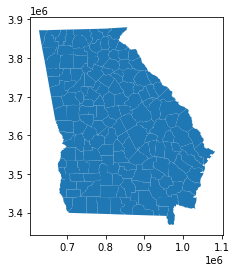

In [7]:
db.crs
db.plot()

<AxesSubplot:>

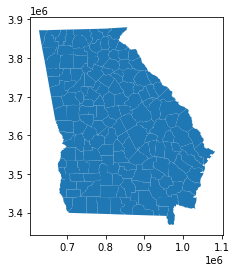

In [8]:
db.crs = "EPSG:26917"
db.plot()

<AxesSubplot:>

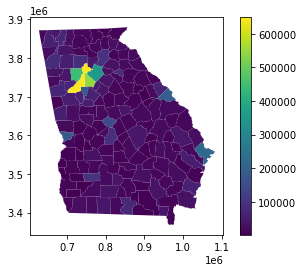

In [9]:
# continuous shading

db.plot(column="TotPop90", 
        categorical = False, 
        legend = True
       )

<AxesSubplot:>

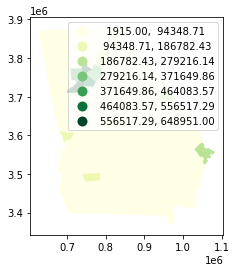

In [10]:
# eq interval

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True
       )

<AxesSubplot:>

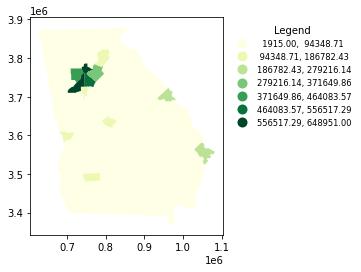

In [11]:
### let's move the legend out of the way

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )


<AxesSubplot:>

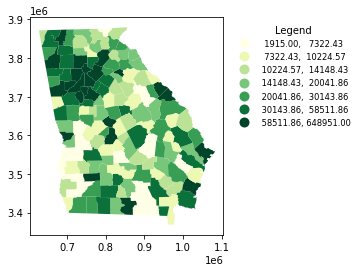

In [12]:
### quantiles

db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [13]:
classi = mapclassify.Quantiles(db["TotPop90"], k=7)
classi

Quantiles                     

       Interval          Count
------------------------------
[  1915.00,   7322.43] |    23
(  7322.43,  10224.57] |    23
( 10224.57,  14148.43] |    22
( 14148.43,  20041.86] |    23
( 20041.86,  30143.86] |    22
( 30143.86,  58511.86] |    23
( 58511.86, 648951.00] |    23

In [14]:
classi.bins

array([  7322.42857143,  10224.57142857,  14148.42857143,  20041.85714286,
        30143.85714286,  58511.85714286, 648951.        ])

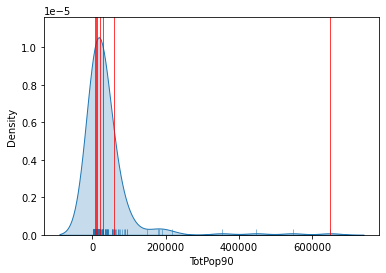

In [15]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["TotPop90"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["TotPop90"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

<AxesSubplot:>

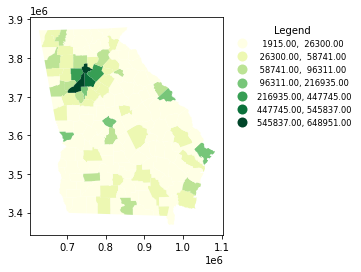

In [16]:
### jenks

db.plot(column="TotPop90", 
        scheme="fisher_jenks", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [17]:
classi = mapclassify.FisherJenks(db["TotPop90"], k=7)
classi

FisherJenks                   

       Interval          Count
------------------------------
[  1915.00,  26300.00] |   109
( 26300.00,  58741.00] |    28
( 58741.00,  96311.00] |    13
( 96311.00, 216935.00] |     5
(216935.00, 447745.00] |     2
(447745.00, 545837.00] |     1
(545837.00, 648951.00] |     1

(700000.0, 800000.0)

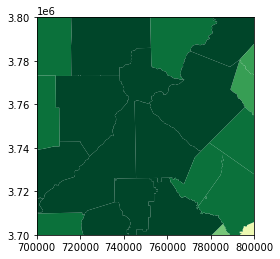

In [18]:
### Zoom in example

# Setup the figure
f, ax = plt.subplots(1)
# Draw the choropleth
db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=False,
        ax=ax
       )
# Redimensionate X and Y axes to desired bounds - zoom into ATL area
ax.set_ylim(3700000, 3800000)
ax.set_xlim(700000, 800000)